# Summer 2022 Data Science Intern Challenge

## Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $\$3145.13$. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


In [47]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Import csv file
sneakers = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

An AOV of $3145.13 seems very unreasonble for a sneaker store. Before investigating what goes wrong, I would like to check the data quality first. There are no missing values or duplicating order ids, so we are good to proceed. 

In [49]:
sneakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [50]:
sneakers[sneakers.duplicated()]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at


In [51]:
sneakers.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


I think the abnormal AOV is due to the outliers in the order amounts. By running the `describe()` function from pandas, we can tell the AOV is indeed $\$3145.13$. Even the $75\%$ percentile is $\$390$, which looks normal for a sneakers store. However, I notice that the maximum order amount is $\$704,000$, which is much higher than the other values and looks unusual. The standard deviation for order amount is 41282.54, indicating that the data is widely spread. These numbers could be considered outliers in the data.

Next, I want to see the distribution of the data.

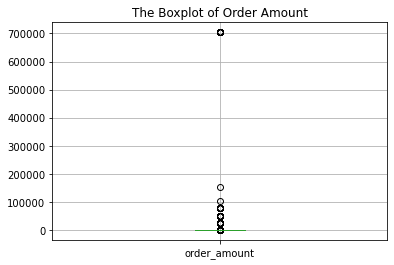

In [52]:
sneakers.boxplot(column='order_amount')
plt.title('The Boxplot of Order Amount')
plt.show()

The boxplot looks extremely right-skewed, and the box can be barely seen. I will find out these amounts by grouping the data by order amount and counting the number of occurances for each group.

In [53]:
unique_amounts = sneakers.groupby(['order_amount']).size().reset_index(name='count').\
sort_values(by='order_amount', ascending=False)
unique_amounts.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


First, we can tell that some amounts appear multiple times, such as 704000, 77175, 51450 and 25725. We want to take a closer look at these number. I will filter out the entries with these amounts for further investigation. The next highest order amount 1760 seems reasonable for a sneakers store, and we might keep the data after it.

In [55]:
pd.set_option('display.max_rows', 61)
sneakers.loc[sneakers['order_amount'].isin([704000, 77175, 51450, 25725])].\
sort_values(by=['order_amount', 'created_at'], ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00


We first notice that the order amount of 704000 is purchased by the same user with user id 607, and the order is made at 4am every day with a credit card. This could be a potential fraud, or the result of error in data management. Also, the order amounts of 77175, 51450 and 25725 are all from the same shop, with shop id 78. They are only different in item quantity. It's interesting to find out all the orders for shop 78.

In [68]:
sneakers.loc[sneakers['shop_id'].isin([78])].sort_values(by=['created_at'], ascending=True)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4311,4312,78,960,51450,2,debit,2017-03-01 3:02:10
4040,4041,78,852,25725,1,cash,2017-03-02 14:31:12
2821,2822,78,814,51450,2,cash,2017-03-02 17:13:25
4412,4413,78,756,51450,2,debit,2017-03-02 4:13:39
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
3780,3781,78,889,25725,1,cash,2017-03-11 21:14:50
3167,3168,78,927,51450,2,cash,2017-03-12 12:23:08


The order amounts of this shop are all very high, and the unit price of the item it's selling is $25725, which is a lot higher than regular sneakers. Thus, this shop could be flagged as fraud as well.

To make sure AOV reflects the dataset well enough, we could remove the outliers. I decide to remove all the rows with order amount that is outside the 1.5 times interquartile range.

In [69]:
def remove_outliers(df):
    first = df.order_amount.quantile(0.25)
    third = df.order_amount.quantile(0.75)
    iqr = third - first
    return df[(df.order_amount >= first - 1.5 * iqr) & (df.order_amount <= third + 1.5 * iqr)]

sneakers_clean = remove_outliers(sneakers)

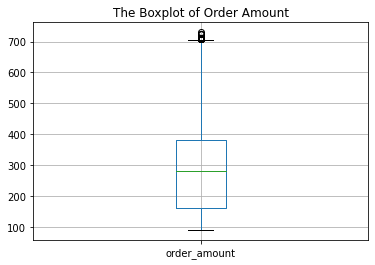

In [70]:
sneakers_clean.boxplot(column='order_amount')
plt.title('The Boxplot of Order Amount')
plt.show()

In [62]:
sneakers_clean.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196
std,1443.356555,29.049171,86.887496,144.453395,0.919791
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000


After removing the outliers, the boxplot represents the dataset better, but it's still right-skewed, with a tail on the right. By running the `describe()` function again, we can see the new AOV is $293.72 with a standard deviation of 144.46.

b. What metric would you report for this dataset?

Since the distribution of the order amount is still right-skewed, I think it would be better to use the Median Order Value (MOV) as the metric instead of AOV. A median is better to eliminate outliers on the high or low end of the data.

c. What is its value?

From the results of the `describe()` function, the MOV is $280.

## Question 2

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a. How many orders were shipped by Speedy Express in total?

```sql
SELECT COUNT(DISTINCT OrderID) FROM
Orders A LEFT JOIN Shippers B
ON A.ShipperID = B.ShipperID
WHERE ShipperName = 'Speedy Express';
```
54 orders were shipped by Speedy Express in total.

b. What is the last name of the employee with the most orders?

```sql
SELECT LastName, Max(Number) FROM
(SELECT *, COUNT(EmployeeID) AS Number FROM
(SELECT A.OrderID, A.EmployeeID, B.LastName FROM
Orders A LEFT JOIN Employees B
ON A.EmployeeID = B.EmployeeID)
GROUP BY EmployeeID);
```

The employee with last name Peacock has the most order, and the number of orders is 40.

c. What product was ordered the most by customers in Germany?

```sql
SELECT ProductName, MaxNumOrders FROM
(SELECT ProductID, MAX(NumOrders) AS MaxNumOrders FROM
(SELECT ProductID, SUM(Quantity) AS NumOrders FROM
(SELECT * FROM
Orders A INNER JOIN OrderDetails B
ON A.OrderID = B.OrderID
WHERE CustomerID IN
(SELECT CustomerID FROM
Customers WHERE Country = 'Germany'))
GROUP BY ProductID)) C
INNER JOIN Products D
ON C.ProductID = D.ProductID;
```

Boston Crab Meat was ordered the most by customers in Germany, and 160 units were sold.